# Exercises from Chap 5 


## Set-Up


In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fb_df = pd.read_csv('data/fb_stock_prices_2018.csv'
    , parse_dates = True
    , index_col = 'date'
    )

quakes_df = pd.read_csv('data/earthquakes.csv')

covid = pd.read_csv('data/covid19_cases.csv'
    ).assign(
    date = lambda x: pd.to_datetime(x['dateRep'], format='%d/%m/%Y')
    ).set_index('date'
    ).replace({
    'United_States_of_America': 'USA'
    })
# covid.info()

## Q1

<AxesSubplot:title={'center':'20 Day Rolling Minimum of Close Price'}, xlabel='date'>

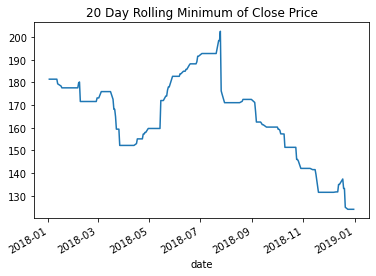

In [147]:
fb_df['close'].rolling('20D').min().plot(
    title = '20 Day Rolling Minimum of Close Price'
    )


## Q2

<AxesSubplot:ylabel='Density'>

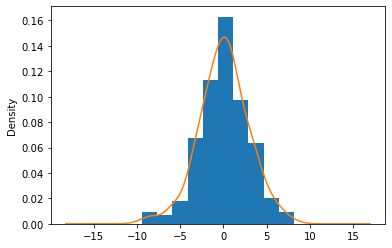

In [148]:
# fb_df =  fb_df.assign(
#     change = lambda x: x['close'] - x['open']
#     )
diff = fb_df['close'] - fb_df['open']

ax = \
diff.plot(kind = 'hist', density=True)
diff.plot(ax = ax, kind = 'kde')

# diff

## Q3

mb            AxesSubplot(0.1,0.15;0.173913x0.75)
ms_20    AxesSubplot(0.308696,0.15;0.173913x0.75)
mwr      AxesSubplot(0.517391,0.15;0.173913x0.75)
mww      AxesSubplot(0.726087,0.15;0.173913x0.75)
dtype: object

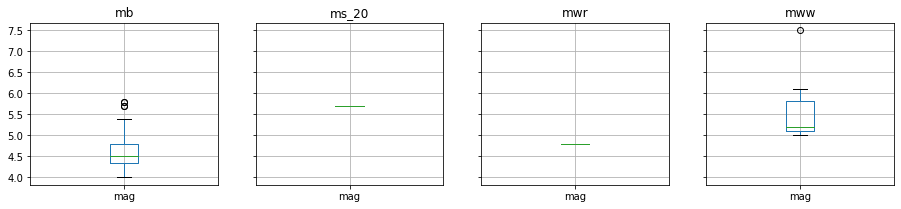

In [149]:
quakes_df.query('parsed_place == "Indonesia"'
    )[['mag', 'magType']].groupby('magType'
    ).boxplot(
    layout = (1,4)
    , figsize = (15,3)
    )


# quakes_df

## Q4

<AxesSubplot:xlabel='date'>

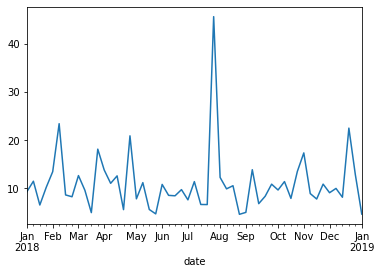

In [150]:
fb_df.resample('W'
    ).agg({
      'low' : 'min'
    , 'high': 'max'
    }).assign(
    diff = lambda x: x['high'] - x['low']  
    )['diff'].plot()

## Q5

<AxesSubplot:xlabel='date'>

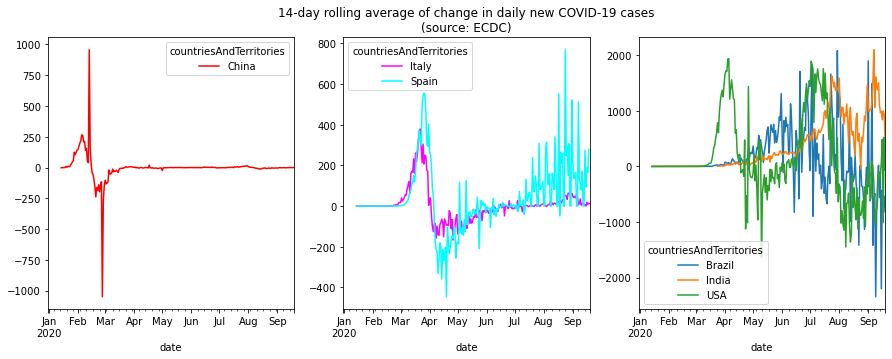

In [151]:
new_cases_rolling_average = covid.pivot_table(
    index=covid.index
    , columns=['countriesAndTerritories']
    , values='cases'
    ).apply(
    lambda x: x.diff().rolling(14).mean()
    )

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

new_cases_rolling_average[['China']].plot(
    ax=axes[0], color='red'
    )

new_cases_rolling_average[['Italy', 'Spain']].plot(
    ax=axes[1], color=['magenta', 'cyan']
    , title='14-day rolling average of change in daily new COVID-19 cases\n(source: ECDC)'
)

new_cases_rolling_average[['Brazil', 'India', 'USA']].plot(ax=axes[2])
# new_cases_rolling_average #.info()

## Q6

,open,high,low,close,volume,prior_close,after_hours_change_in_price,price_change
date,,,,,,,,
2018-01-31,3871.6600,3910.4300,3841.4199,3884.220,495655736,0.000,-3.3500,0.0000
2018-02-28,3433.7100,3479.4967,3377.3762,3425.120,516621991,3884.220,0.0200,-450.5100
2018-03-31,3642.4400,3699.5475,3580.6700,3643.280,996232472,3425.120,-19.3700,217.3200
2018-04-30,3447.4347,3487.8186,3392.4710,3440.020,751130388,3643.280,19.6247,-195.8453
2018-05-31,4002.0312,4045.2092,3980.9007,4024.460,401144183,3440.020,-2.6488,562.0112
2018-06-30,4094.4554,4132.7443,4056.7700,4100.620,387265765,4024.460,-3.6246,69.9954
2018-07-31,4185.9750,4233.5600,4147.6001,4199.310,652763259,4100.620,-35.0750,85.3550
2018-08-31,4084.7642,4126.9800,4040.6615,4082.315,549016789,4199.310,5.5992,-114.5458
2018-09-30,3120.4250,3161.5858,3085.9178,3123.170,500468912,4082.315,-14.0150,-961.8900


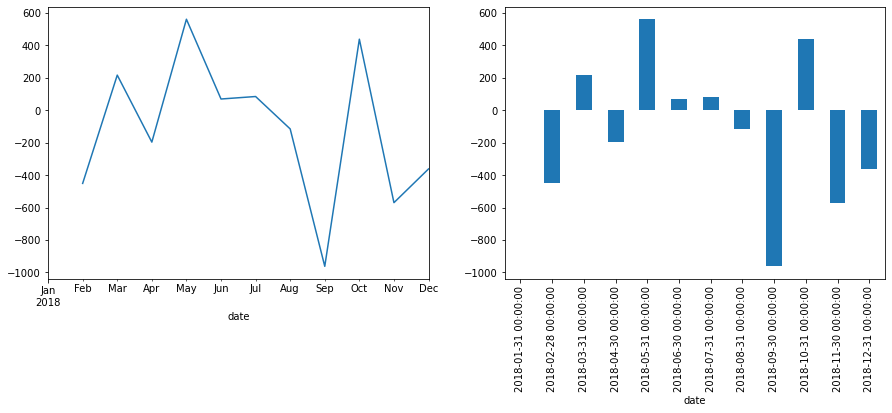

In [178]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

fb_df =  fb_df.assign(
      prior_close = lambda x: x['close'].shift()
    , price_change= lambda x: x['open'] - x['prior_close']
    )

fb_df['price_change'].plot(
  ax=axes[0]
  )

fb_df = fb_df.resample('1M').sum()

fb_df['price_change'].plot(
    ax=axes[1]
  , kind='bar'
  )

fb_df


## Q7

## Q8

## Q9

## Q10